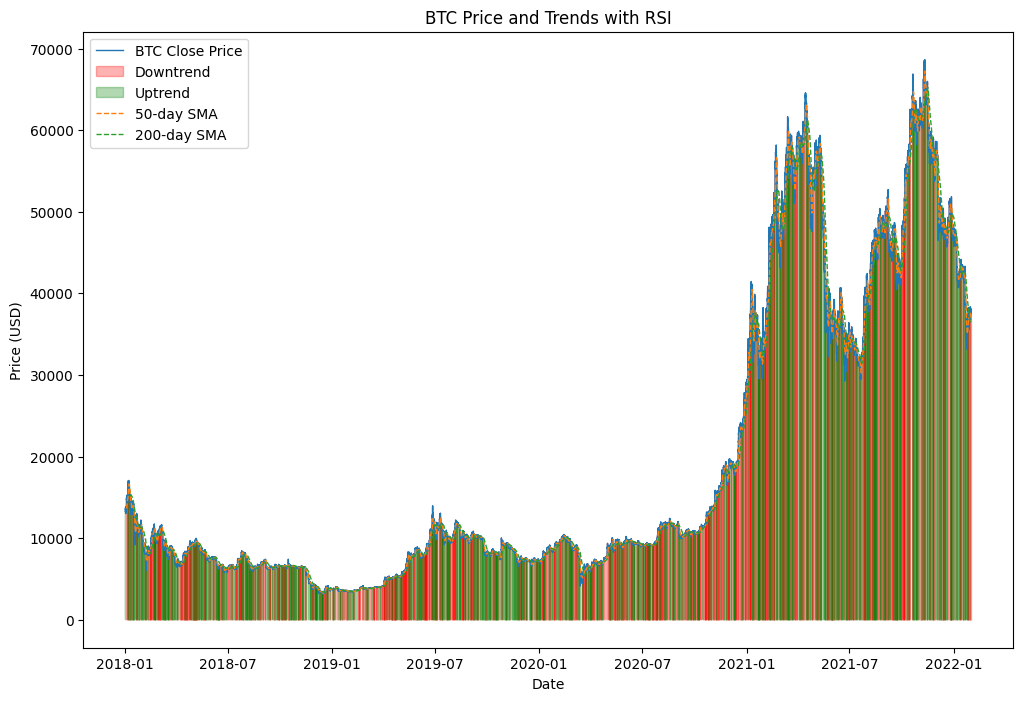

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load BTC price data (replace 'your_btc_data.csv' with the actual CSV file containing your data)
btc_data = pd.read_csv('btc_1h.csv', parse_dates=True, index_col='datetime')

# Calculate moving averages for trend analysis
btc_data['SMA_50'] = btc_data['close'].rolling(window=50).mean()
btc_data['SMA_200'] = btc_data['close'].rolling(window=200).mean()

# Calculate the Relative Strength Index (RSI) for momentum analysis
def calculate_rsi(data, window=14):
    close_diff = data['close'].diff()
    gain = close_diff.where(close_diff > 0, 0)
    loss = -close_diff.where(close_diff < 0, 0)
    
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

btc_data['RSI'] = calculate_rsi(btc_data)

# Define a threshold for trend detection based on RSI values
rsi_threshold = 70

# Visualize trends with shaded regions
plt.figure(figsize=(12, 8))

# Plot BTC Close Price
plt.plot(btc_data.index, btc_data['close'], label='BTC Close Price', linewidth=1)

# Shade regions where RSI is above the threshold (potential downtrend)
plt.fill_between(btc_data.index, btc_data['close'], where=(btc_data['RSI'] > rsi_threshold), color='red', alpha=0.3, label='Downtrend')

# Shade regions where RSI is below the threshold (potential uptrend)
plt.fill_between(btc_data.index, btc_data['close'], where=(btc_data['RSI'] < (100 - rsi_threshold)), color='green', alpha=0.3, label='Uptrend')

# Plot moving averages
plt.plot(btc_data.index, btc_data['SMA_50'], label='50-day SMA', linestyle='--', linewidth=1)
plt.plot(btc_data.index, btc_data['SMA_200'], label='200-day SMA', linestyle='--', linewidth=1)

plt.title('BTC Price and Trends with RSI')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()